<h1> Librerias Necesarias </h1>

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import copy
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
import time
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from numpy.core.numeric import argwhere
from matplotlib.colors import ListedColormap

## Carga Datasets

In [113]:
df_frutas = pickle.load(open('Frutas_Dataset_Completo.pkl','rb'))
del df_frutas['Unnamed: 0']
#df_frutas = pickle.load(open('Frutas_Dataset.pkl','rb'))
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   clase      2500 non-null   object 
 1   azul       2500 non-null   float64
 2   verde      2500 non-null   float64
 3   rojo       2500 non-null   float64
 4   area       2500 non-null   float64
 5   ratio      2500 non-null   float64
 6   textura    2500 non-null   float64
 7   perimetro  2500 non-null   float64
dtypes: float64(7), object(1)
memory usage: 156.4+ KB


In [114]:
df_frutas[['clase']] = df_frutas[['clase']].astype('int64')
df_frutas[['azul']] = df_frutas[['azul']].astype('float64')
df_frutas[['verde']] = df_frutas[['verde']].astype('float64')
df_frutas[['rojo']] = df_frutas[['rojo']].astype('float64')
df_frutas[['area']] = df_frutas[['area']].astype('float64')
df_frutas[['ratio']] = df_frutas[['ratio']].astype('float64')
df_frutas[['textura']] = df_frutas[['textura']].astype('float64')
df_frutas[['perimetro']] = df_frutas[['perimetro']].astype('float64')
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   clase      2500 non-null   int64  
 1   azul       2500 non-null   float64
 2   verde      2500 non-null   float64
 3   rojo       2500 non-null   float64
 4   area       2500 non-null   float64
 5   ratio      2500 non-null   float64
 6   textura    2500 non-null   float64
 7   perimetro  2500 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 156.4 KB


# Analisis estadistico

### Descripción

In [115]:
df_frutas.describe()
df_frutas_final = df_frutas.copy()

## Normalización

In [116]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["clase"]=dataset["clase"]
    return dataNorm

In [117]:
df_frutas_norm = normalize(df_frutas)
df_frutas_norm.describe()

clase         azul        verde         rojo         area  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      4.500000     0.319487     0.388782     0.393163     0.271317   
std       2.872856     0.186980     0.226646     0.216817     0.245815   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.163744     0.193658     0.201948     0.039097   
50%       4.500000     0.288263     0.420036     0.409306     0.257686   
75%       7.000000     0.458450     0.560860     0.550000     0.322361   
max       9.000000     1.000000     1.000000     1.000000     1.000000   

             ratio      textura    perimetro  
count  2500.000000  2500.000000  2500.000000  
mean      0.779903     0.426350     0.333129  
std       0.231890     0.191065     0.218804  
min       0.000000     0.000000     0.000000  
25%       0.737099     0.274034     0.145939  
50%       0.843184     0.442175     0.342780  
75%       0.933723     0.578357     0.386101  
max       1.000000     1.000000     1.000000

#### Maximos y minimos

In [118]:
print('min', df_frutas_norm.min())
df_frutas_norm.max()

min clase        0.0
azul         0.0
verde        0.0
rojo         0.0
area         0.0
ratio        0.0
textura      0.0
perimetro    0.0
dtype: float64


clase        9.0
azul         1.0
verde        1.0
rojo         1.0
area         1.0
ratio        1.0
textura      1.0
perimetro    1.0
dtype: float64

In [119]:
df_frutas_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   clase      2500 non-null   int64  
 1   azul       2500 non-null   float64
 2   verde      2500 non-null   float64
 3   rojo       2500 non-null   float64
 4   area       2500 non-null   float64
 5   ratio      2500 non-null   float64
 6   textura    2500 non-null   float64
 7   perimetro  2500 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 156.4 KB


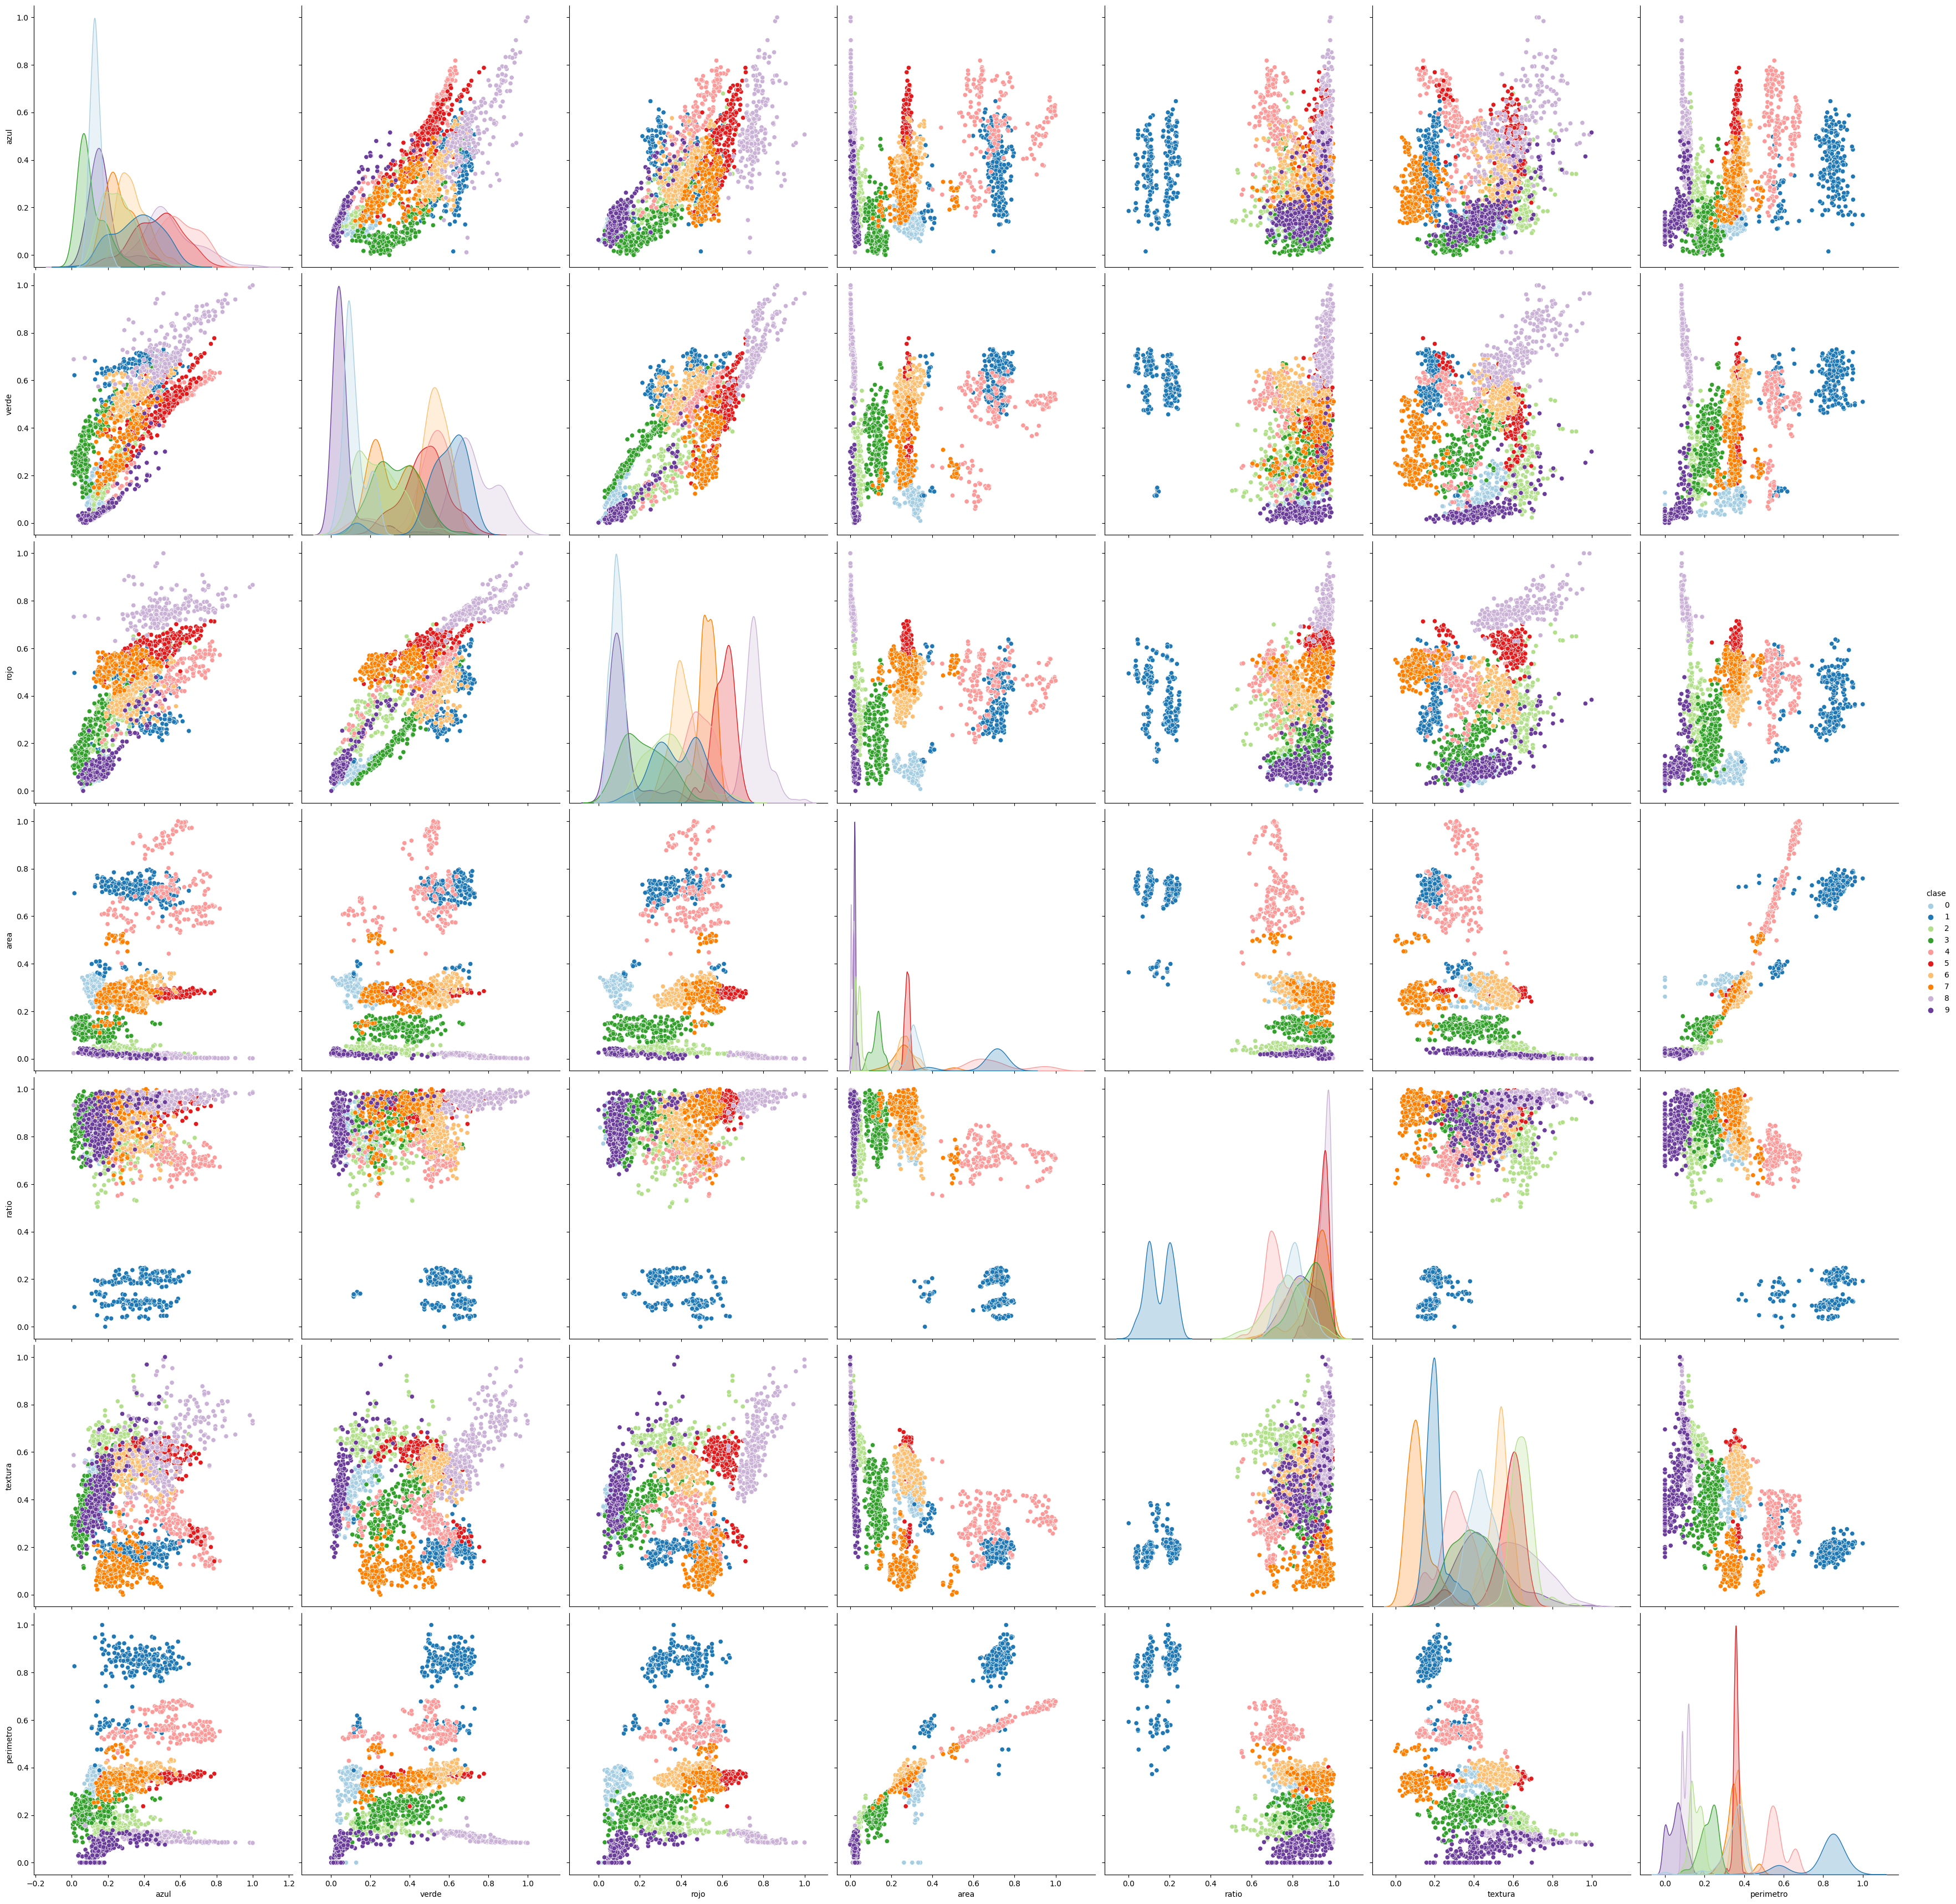

In [120]:
sns.pairplot(df_frutas_norm ,hue='clase', palette= 'Paired',  height = 5) # Con Heigth se configura el tamaño del plot

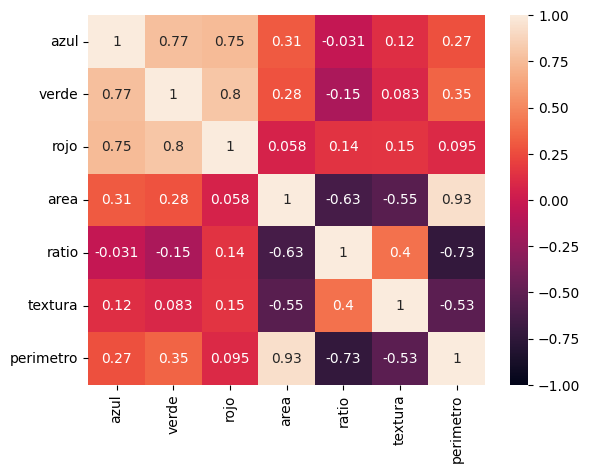

In [121]:
#Matriz de correlación
df_frutas_corr =df_frutas_norm.copy()
del df_frutas_corr["clase"]
heatmap = sns.heatmap(df_frutas_corr.corr(), vmin=-1, vmax=1, annot=True)

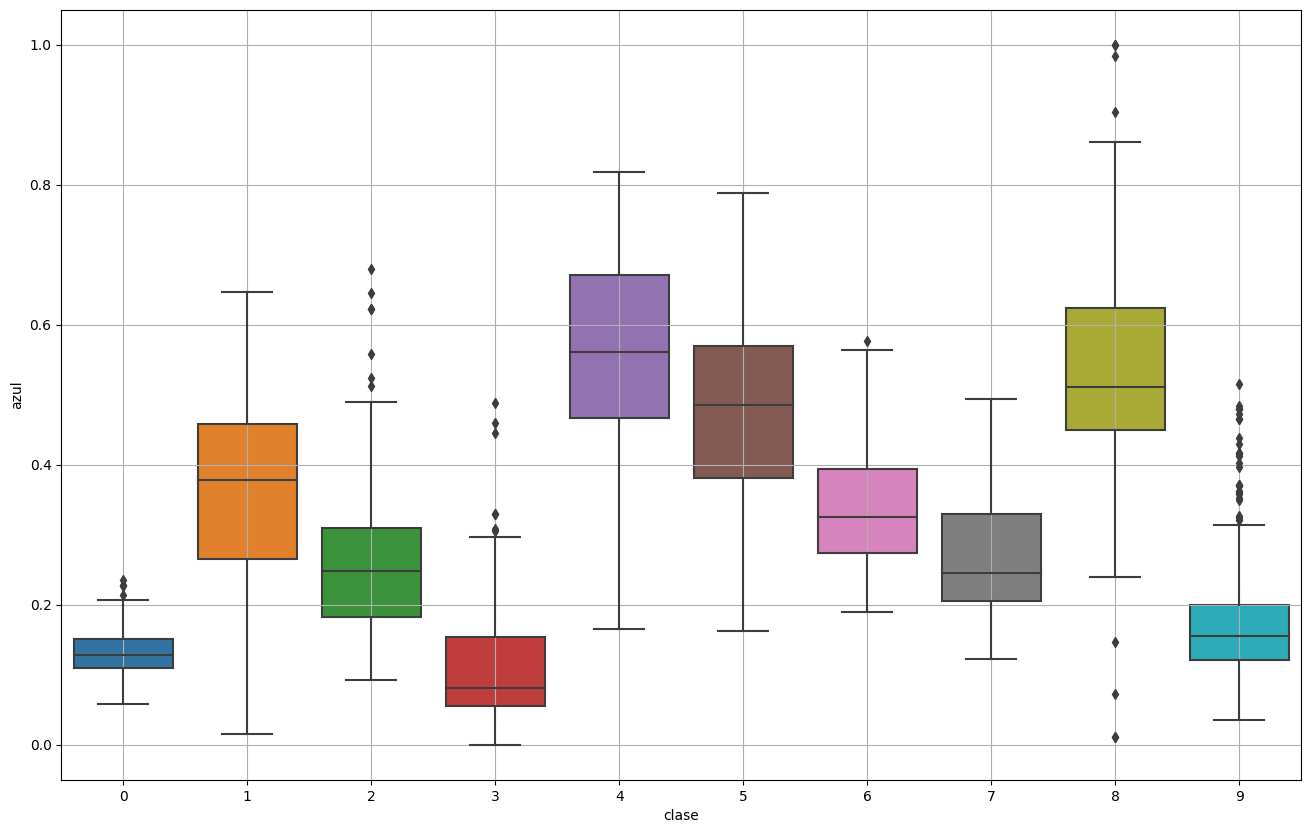

In [122]:
df_frutas = df_frutas_norm.copy()
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas['clase'], y = df_frutas['azul'])
ax.grid()

<AxesSubplot:xlabel='clase', ylabel='azul'>

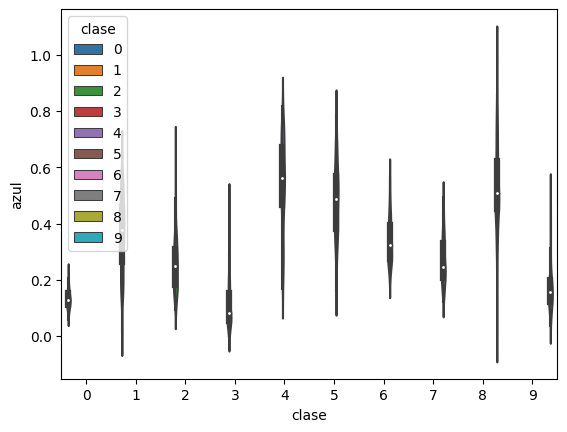

In [123]:
#
sns.violinplot(x=df_frutas_norm.clase,y=df_frutas_norm.azul,data=df_frutas_norm,hue='clase')

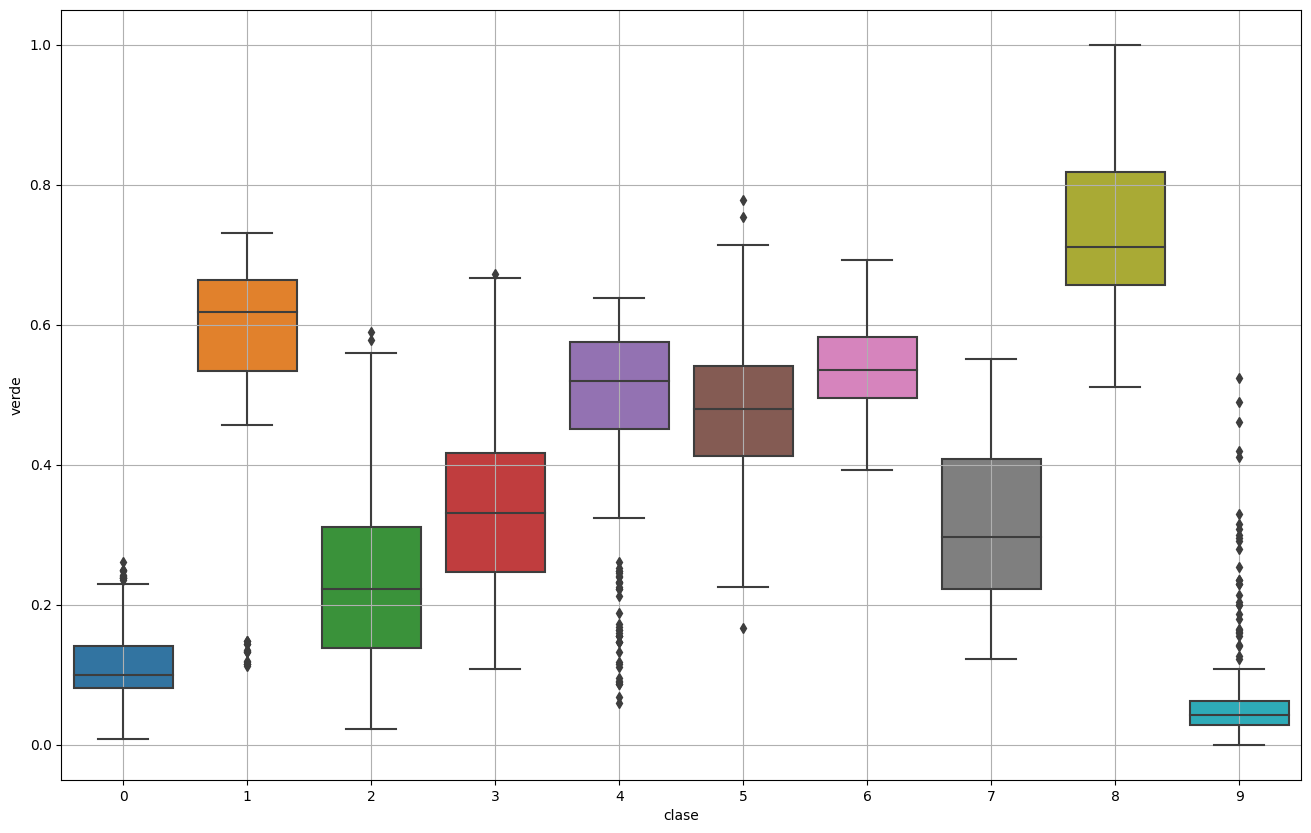

In [124]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['verde'])
ax.grid()

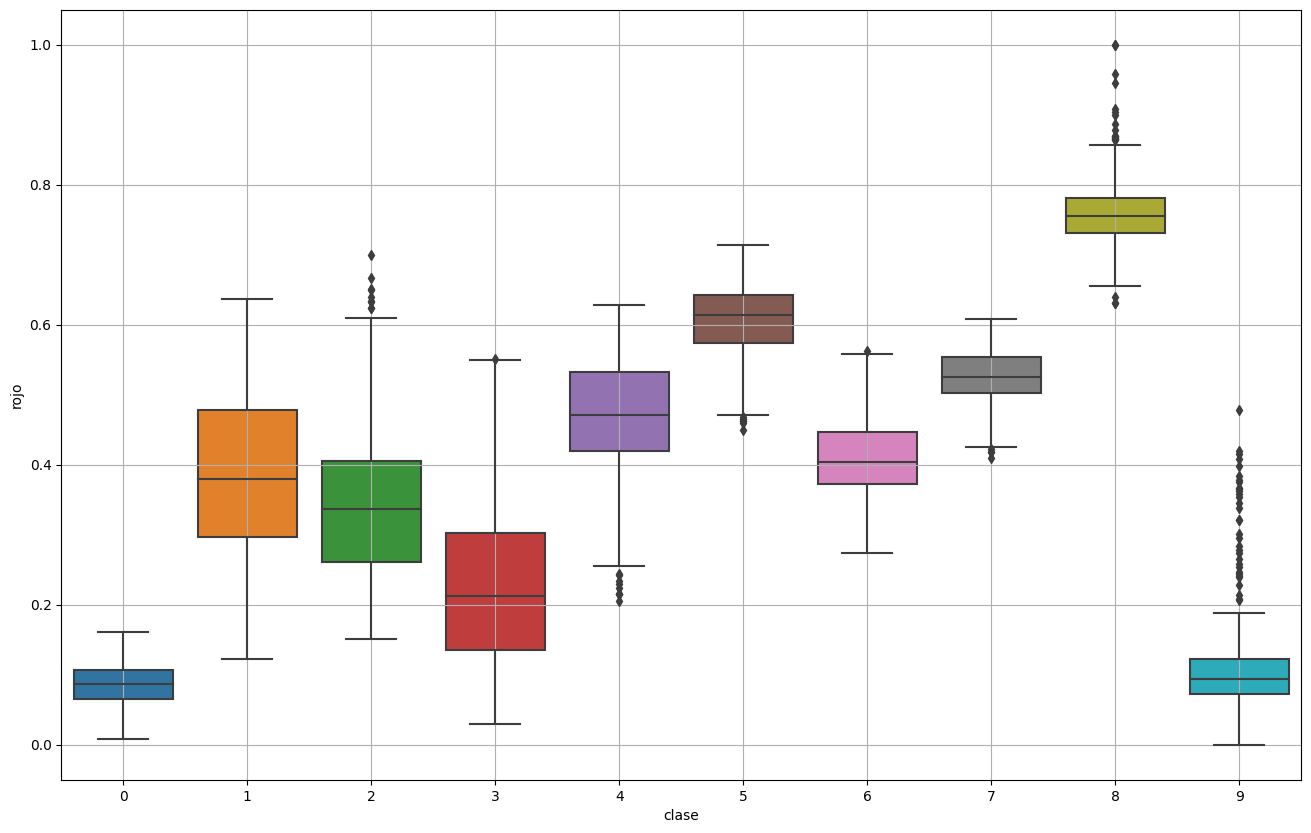

In [125]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['rojo'])
ax.grid()

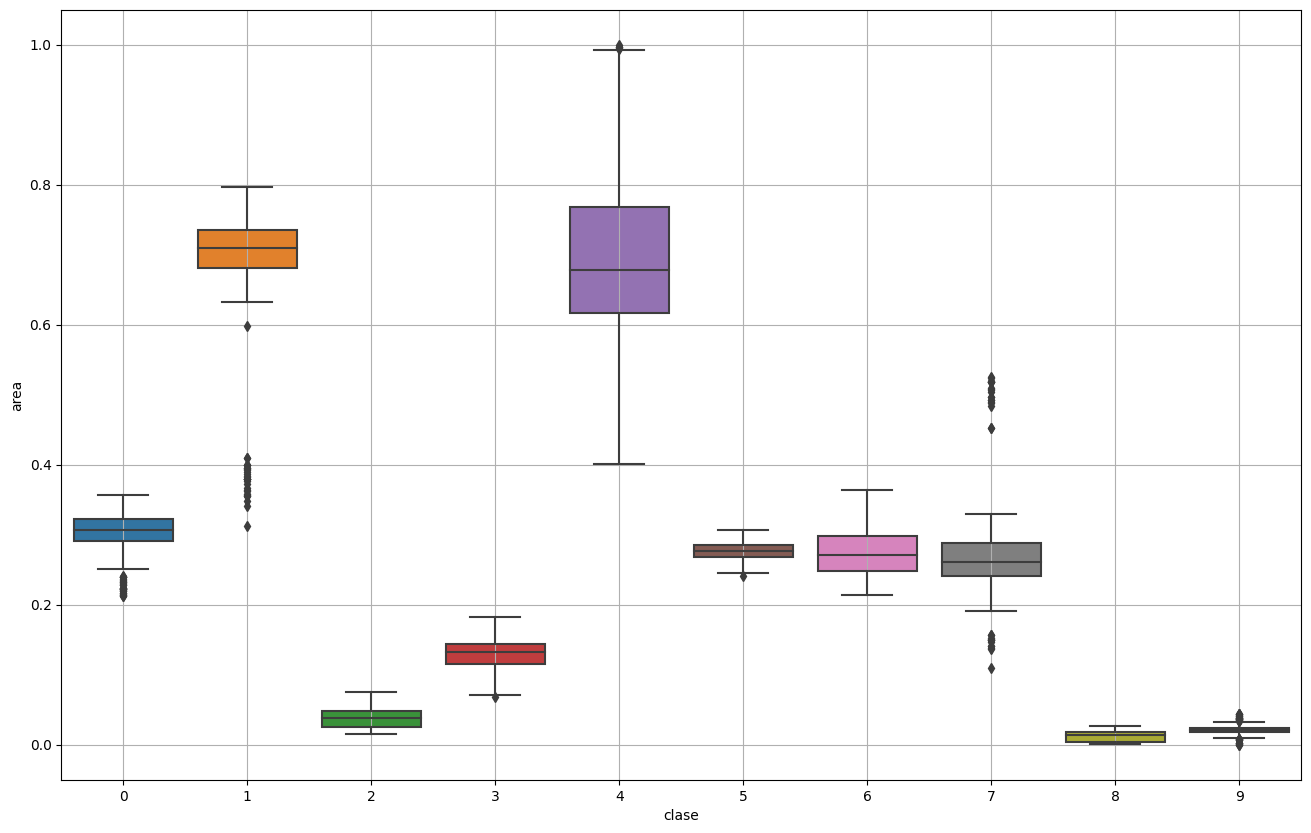

In [126]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['area'])
ax.grid()

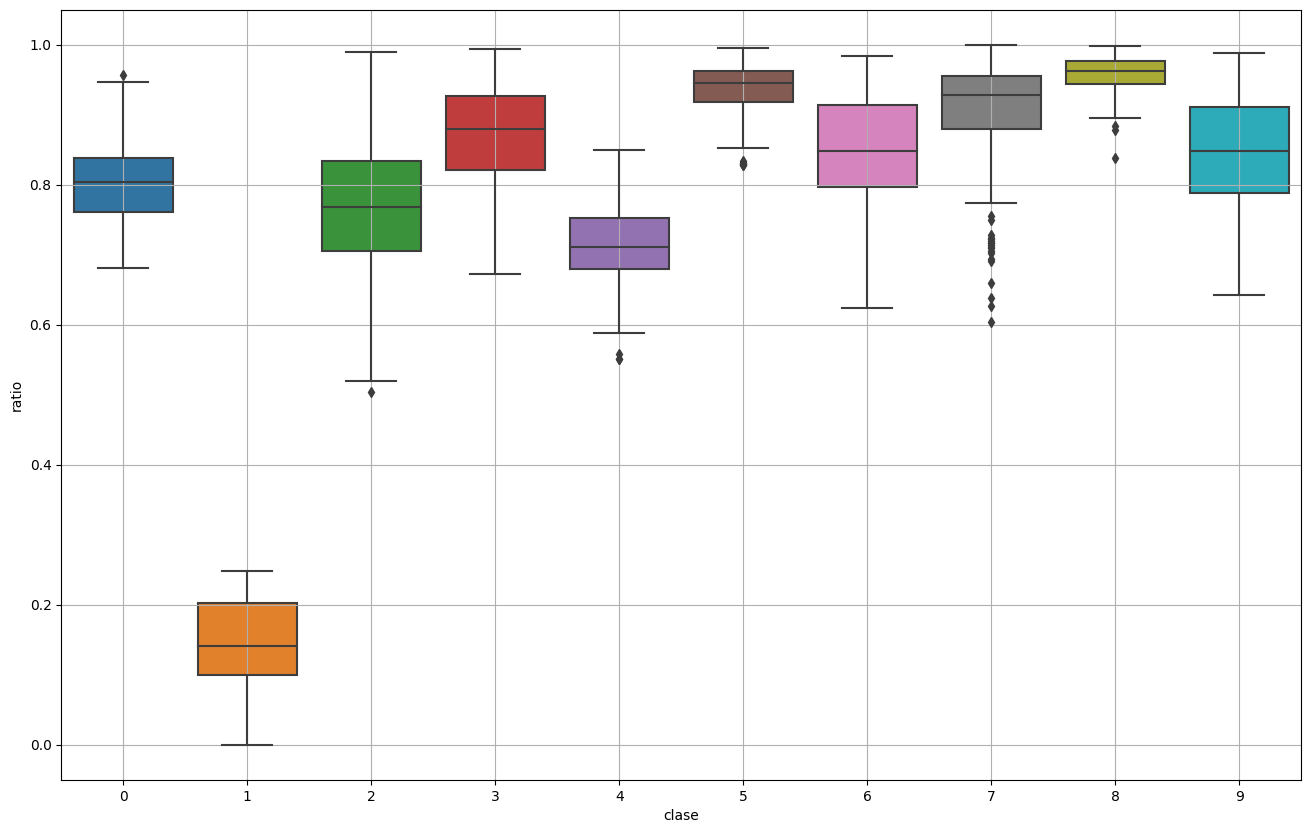

In [127]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['ratio'])
ax.grid()

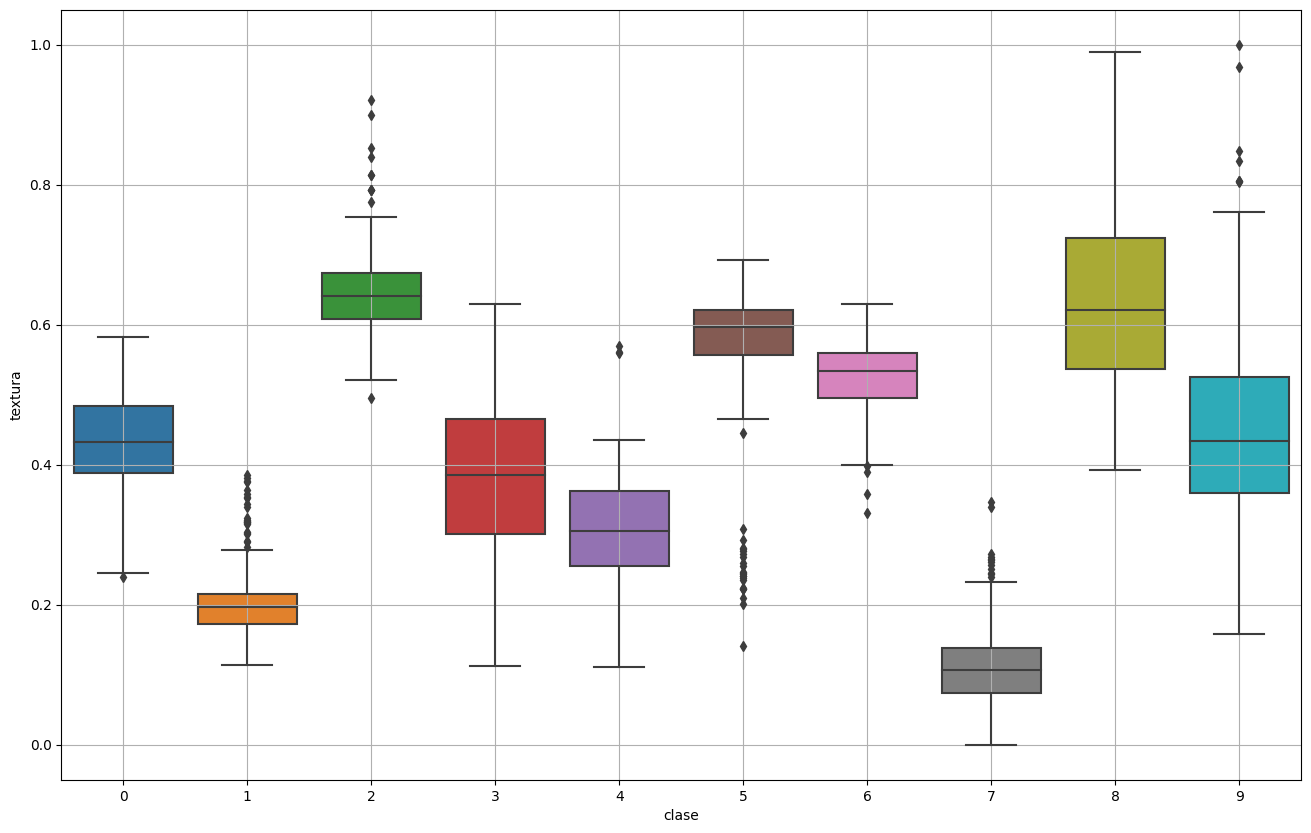

In [128]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['textura'])
ax.grid()

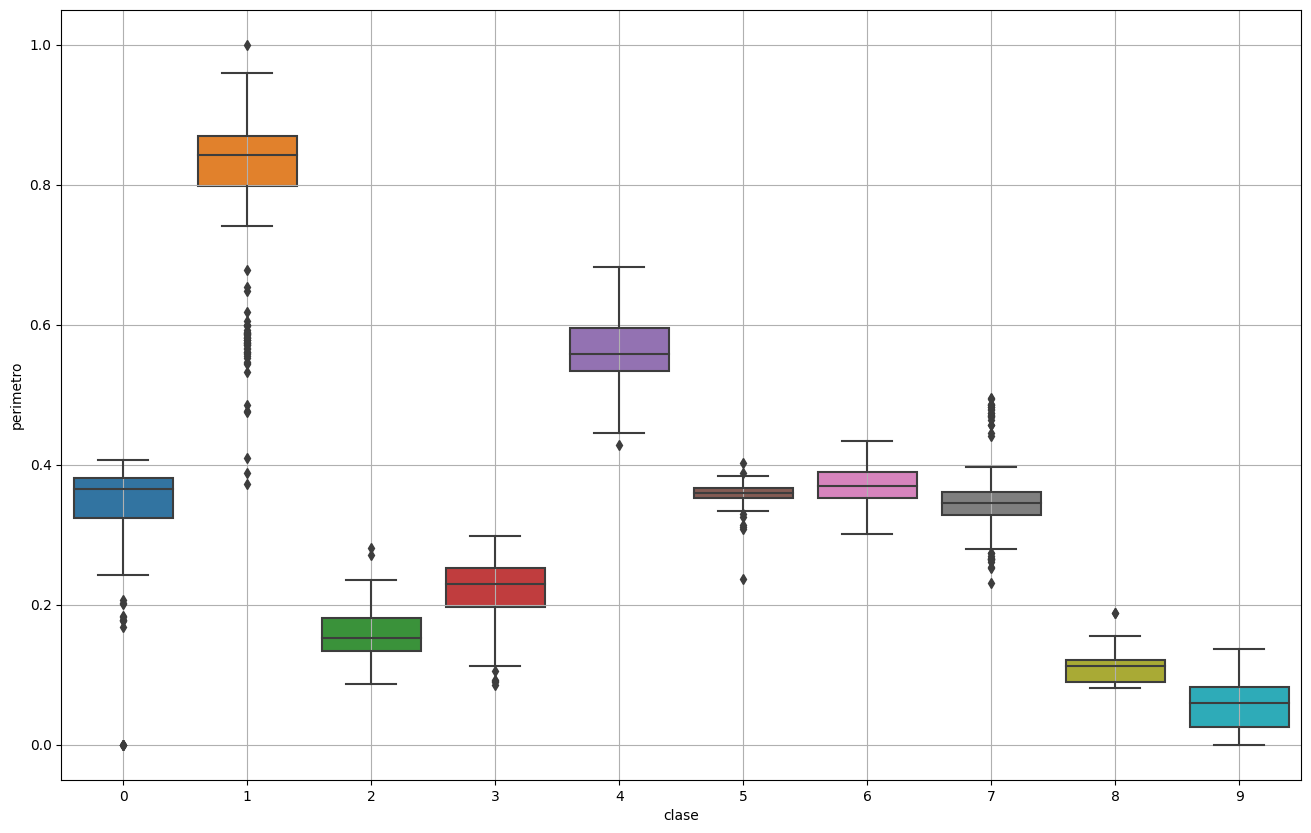

In [129]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = df_frutas_norm['clase'], y = df_frutas_norm['perimetro'])
ax.grid()

# Analisis por clase


In [130]:
df_frutas = df_frutas_norm.copy()

is_CAT = df_frutas.loc[:, 'clase'] == 0
CAT = df_frutas.loc[is_CAT]

is_BAN = df_frutas.loc[:, 'clase'] == 1
BAN = df_frutas.loc[is_BAN]

is_FRE = df_frutas.loc[:, 'clase'] == 2
FRE = df_frutas.loc[is_FRE]

is_LIM = df_frutas.loc[:, 'clase'] == 3
LIM = df_frutas.loc[is_LIM]

is_FRE = df_frutas.loc[:, 'clase'] == 4
MAN = df_frutas.loc[is_FRE]


is_ZAN = df_frutas.loc[:, 'clase'] == 5
ZAN = df_frutas.loc[is_ZAN]

is_PER = df_frutas.loc[:, 'clase'] == 6
PER = df_frutas.loc[is_PER]

is_TOM = df_frutas.loc[:, 'clase'] == 7
TOM = df_frutas.loc[is_TOM]

is_UVA = df_frutas.loc[:, 'clase'] == 8
UVA = df_frutas.loc[is_UVA]

is_UCH = df_frutas.loc[:, 'clase'] == 9
UCH = df_frutas.loc[is_UCH]



In [131]:
def norm_distrib_fruta(DT):
  print(DT.describe())
  del DT['clase']
  mean = DT.mean()
  std  = DT.std() 

  return  mean, std


### Aguacate


In [132]:
CAT_mean, CAT_std = norm_distrib_fruta(CAT)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.0    0.132011    0.117623    0.086620    0.300704    0.802370   
std      0.0    0.031783    0.055635    0.030249    0.034908    0.060055   
min      0.0    0.058316    0.008814    0.007716    0.211972    0.680952   
25%      0.0    0.110142    0.081183    0.065724    0.290888    0.761578   
50%      0.0    0.128879    0.099346    0.086856    0.306533    0.803324   
75%      0.0    0.151551    0.141519    0.107119    0.322963    0.838128   
max      0.0    0.235962    0.260603    0.161235    0.356943    0.956315   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.434517    0.341001  
std      0.066629    0.067844  
min      0.240013    0.000000  
25%      0.387572    0.323556  
50%      0.432544    0.365704  
75%      0.483850    0.380415  
max      0.582841    0.406137  


### Banano

In [133]:
BAN_mean, BAN_std = norm_distrib_fruta(BAN)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     1.0    0.362354    0.580807    0.387867    0.674811    0.148727   
std      0.0    0.127239    0.130648    0.116097    0.114982    0.060408   
min      1.0    0.015003    0.112832    0.122709    0.312345    0.000000   
25%      1.0    0.264983    0.534091    0.296074    0.681427    0.099148   
50%      1.0    0.378027    0.618577    0.379129    0.709748    0.140757   
75%      1.0    0.458704    0.664340    0.477565    0.734611    0.201927   
max      1.0    0.647295    0.730691    0.637130    0.796502    0.247548   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.204183    0.800849  
std      0.051589    0.121078  
min      0.114314    0.372563  
25%      0.172147    0.798195  
50%      0.197016    0.841877  
75%      0.215795    0.869495  
max      0.385205    1.000000  


### Fresa

In [134]:

FRE_mean, FRE_std = norm_distrib_fruta(FRE)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     2.0    0.256360    0.239881    0.345160    0.037225    0.765651   
std      0.0    0.099922    0.113528    0.115426    0.013374    0.096884   
min      2.0    0.092309    0.022596    0.151128    0.015113    0.504495   
25%      2.0    0.182371    0.138156    0.260502    0.025110    0.704801   
50%      2.0    0.247541    0.222381    0.337374    0.038250    0.768375   
75%      2.0    0.309834    0.310745    0.405576    0.047667    0.834238   
max      2.0    0.679628    0.589992    0.700138    0.075110    0.989090   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.647576    0.156960  
std      0.057395    0.031386  
min      0.495719    0.087004  
25%      0.607731    0.133574  
50%      0.641279    0.152708  
75%      0.674501    0.180505  
max      0.921522    0.281588  


### Limon

In [135]:
LIM_mean, LIM_std = norm_distrib_fruta(LIM)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     3.0    0.108088    0.336535    0.223914    0.129086    0.871018   
std      0.0    0.080633    0.113364    0.108456    0.026037    0.071602   
min      3.0    0.000000    0.108070    0.030158    0.068762    0.672806   
25%      3.0    0.054747    0.246211    0.135977    0.114642    0.821559   
50%      3.0    0.081340    0.331725    0.212514    0.132931    0.880259   
75%      3.0    0.153996    0.416538    0.302179    0.143952    0.926422   
max      3.0    0.488498    0.672055    0.551544    0.182580    0.994550   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.385051    0.221043  
std      0.102162    0.042687  
min      0.112805    0.085199  
25%      0.300937    0.196119  
50%      0.384624    0.229242  
75%      0.464937    0.253069  
max      0.629388    0.298556  


### Mango



In [136]:
MAN_mean, MAN_std = norm_distrib_fruta(MAN)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     4.0    0.543002    0.477859    0.465419    0.711972    0.715189   
std      0.0    0.154201    0.142049    0.090248    0.137003    0.055686   
min      4.0    0.166008    0.059631    0.205036    0.400947    0.551126   
25%      4.0    0.466999    0.450472    0.419806    0.617204    0.679245   
50%      4.0    0.561616    0.519509    0.471553    0.678762    0.710727   
75%      4.0    0.671611    0.575799    0.533011    0.767686    0.752913   
max      4.0    0.818338    0.638842    0.628196    1.000000    0.849253   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.302118    0.570488  
std      0.085034    0.052593  
min      0.110330    0.428520  
25%      0.255805    0.533303  
50%      0.305769    0.558664  
75%      0.362294    0.595217  
max      0.569806    0.683032  


### Manzana

In [137]:
ZAN_mean, ZAN_std = norm_distrib_fruta(ZAN)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     5.0    0.475845    0.477785    0.606363    0.276840    0.936989   
std      0.0    0.132168    0.113011    0.051112    0.011563    0.035579   
min      5.0    0.161772    0.166467    0.449791    0.241293    0.828494   
25%      5.0    0.380491    0.412110    0.573204    0.268268    0.917481   
50%      5.0    0.486027    0.479802    0.614527    0.276708    0.945153   
75%      5.0    0.569927    0.540832    0.642333    0.285104    0.962874   
max      5.0    0.787857    0.777467    0.714235    0.307133    0.994638   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.562273    0.358562  
std      0.107689    0.014232  
min      0.140668    0.237184  
25%      0.556146    0.351986  
50%      0.596280    0.359025  
75%      0.620847    0.366336  
max      0.693055    0.401805  


### Pera

In [138]:
PER_mean, PER_std = norm_distrib_fruta(PER)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     6.0    0.338419    0.538505    0.408203    0.276093    0.849688   
std      0.0    0.081029    0.058704    0.059325    0.035773    0.079065   
min      6.0    0.189791    0.391769    0.273752    0.213884    0.624432   
25%      6.0    0.273668    0.495351    0.372394    0.247560    0.797163   
50%      6.0    0.324607    0.534728    0.403822    0.271344    0.848697   
75%      6.0    0.394245    0.583057    0.447335    0.298510    0.914289   
max      6.0    0.576237    0.692921    0.562260    0.363868    0.983977   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.526083    0.370760  
std      0.054010    0.026019  
min      0.331018    0.300361  
25%      0.495115    0.352166  
50%      0.534238    0.370036  
75%      0.558972    0.389170  
max      0.629437    0.433213  


### Tomate

In [139]:
TOM_mean, TOM_std = norm_distrib_fruta(TOM)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     7.0    0.267339    0.315618    0.524520    0.272556    0.904818   
std      0.0    0.082099    0.106949    0.039321    0.078747    0.075359   
min      7.0    0.122604    0.122950    0.410302    0.109533    0.603925   
25%      7.0    0.204758    0.223111    0.502140    0.241732    0.879052   
50%      7.0    0.245956    0.297014    0.525384    0.261028    0.928067   
75%      7.0    0.329390    0.407735    0.553945    0.288503    0.954648   
max      7.0    0.494531    0.551215    0.608314    0.525719    1.000000   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.115254    0.348618  
std      0.058662    0.046166  
min      0.000000    0.230325  
25%      0.074191    0.327888  
50%      0.106056    0.344765  
75%      0.137786    0.361733  
max      0.347360    0.496029  


### Uva

In [140]:
UVA_mean, UVA_std = norm_distrib_fruta(UVA)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     8.0    0.533450    0.735369    0.763232    0.012203    0.957697   
std      0.0    0.155314    0.105830    0.055497    0.007300    0.024704   
min      8.0    0.010908    0.510466    0.630733    0.000648    0.838339   
25%      8.0    0.450208    0.656540    0.730487    0.004202    0.943725   
50%      8.0    0.510327    0.710445    0.755433    0.013528    0.962598   
75%      8.0    0.624255    0.817963    0.781330    0.018103    0.976766   
max      8.0    1.000000    1.000000    1.000000    0.026883    0.997840   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.631289    0.107837  
std      0.126584    0.017518  
min      0.392636    0.081588  
25%      0.536950    0.089170  
50%      0.621059    0.111913  
75%      0.723177    0.121209  
max      0.989485    0.188448  


### Uchuva


In [141]:
UCH_mean, UCH_std = norm_distrib_fruta(UCH)

       clase        azul       verde        rojo        area       ratio  \
count  250.0  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     9.0    0.178001    0.067843    0.120338    0.021683    0.846886   
std      0.0    0.093037    0.083279    0.085447    0.007376    0.078671   
min      9.0    0.035971    0.000000    0.000000    0.000000    0.641827   
25%      9.0    0.121024    0.027710    0.071833    0.018592    0.788832   
50%      9.0    0.155452    0.042087    0.094377    0.021299    0.847872   
75%      9.0    0.199341    0.061795    0.123171    0.024603    0.910402   
max      9.0    0.515532    0.524025    0.478417    0.044383    0.988837   

          textura   perimetro  
count  250.000000  250.000000  
mean     0.455159    0.055175  
std      0.140216    0.038035  
min      0.158531    0.000000  
25%      0.359685    0.025181  
50%      0.433727    0.059928  
75%      0.525434    0.082942  
max      1.000000    0.136101  


# Funciones para metricas

In [162]:
def metrics_train_test(y_train_true,y_train_pred,y_test_true, y_test_pred, y_valid_true, y_valid_pred, time_train, time_pred, time_valid,  label,model_clf = 'KNN'):
        # auc curve
        #train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_true, y_train_pred,pos_label=label)
        #test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test_true, y_test_pred,pos_label=label)

        # Scores of train dataset
        #train_auc = metrics.auc(train_fpr, train_tpr)
        train_acc = metrics.accuracy_score(y_train_true, y_train_pred)
        train_precision = metrics.precision_score(y_train_true, y_train_pred, average='macro')
        train_recall = metrics.recall_score(y_train_true, y_train_pred, average='macro')
        train_f1 = metrics.f1_score(y_train_true, y_train_pred, average='macro')

        # Scores of test dataset
        #test_auc = metrics.auc(test_fpr, test_tpr)
        test_acc = metrics.accuracy_score(y_test_true, y_test_pred)
        test_precision = metrics.precision_score(y_test_true, y_test_pred, average='macro')
        test_recall = metrics.recall_score(y_test_true, y_test_pred, average='macro')
        test_f1 = metrics.f1_score(y_test_true, y_test_pred, average='macro')

        # Scores of Valid dataset
        #test_auc = metrics.auc(test_fpr, test_tpr)
        valid_acc = metrics.accuracy_score(y_valid_true, y_valid_pred)
        valid_precision = metrics.precision_score(y_valid_true, y_valid_pred, average='macro')
        valid_recall = metrics.recall_score(y_valid_true, y_valid_pred, average='macro')
        valid_f1 = metrics.f1_score(y_valid_true, y_valid_pred, average='macro')

        col = ['DataSet','Model','Neighbors','Accuracy','Precision', 'Recall', 'F1','Time (s)']
        data = [['Train', model_clf,'5', train_acc,train_precision,train_recall,train_f1,time_train],
                ['Test', model_clf,'5', test_acc,test_precision,test_recall,test_f1,time_pred],
                ['Valid', model_clf,'5', valid_acc,valid_precision,valid_recall,valid_f1,time_valid]]
        df_metrics = pd.DataFrame(data, columns = col)

        # Plot AUC curve
        '''plt.figure()
        plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
        plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid()
        plt.title("Train Curve ROC")
        plt.legend()
        plt.show()'''

        return df_metrics

# Separar datos en entrenamiento, prueba y validación
* Train      70 % --> 1750
* Test       20 % --> 500
* Validación 10 % --> 250

In [143]:
df_frutas = df_frutas_norm.copy()
x = df_frutas_norm.drop(['clase'], axis = 1)       #Entradas
y =  df_frutas_norm['clase']                       #Targets

r = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = r )


In [144]:
clf = KNeighborsClassifier()
param = dict(n_neighbors=list(range(1, 33,2)),
weights=['distance','uniform'],
algorithm=['auto','brute','ball_tree'],
metric=['chebyshev','minkowski'],
p=[1,2,np.inf])

# initialization
scoring = {'acc' : 'accuracy',
        'f1_micro':'f1_micro'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV 1/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=distance; acc: (train=1.000, test=0.991) f1_micro: (train=1.000, test=0.991) total time=   0.0s
[CV 2/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=distance; acc: (train=1.000, test=0.991) f1_micro: (train=1.000, test=0.991) total time=   0.0s
[CV 3/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=distance; acc: (train=1.000, test=0.997) f1_micro: (train=1.000, test=0.997) total time=   0.0s
[CV 1/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=uniform; acc: (train=1.000, test=0.991) f1_micro: (train=1.000, test=0.991) total time=   0.0s
[CV 2/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=uniform; acc: (train=1.000, test=0.991) f1_micro: (train=1.000, test=0.991) total time=   0.0s
[CV 3/3] END algorithm=auto, metric=chebyshev, n_neighbors=1, p=1, weights=uniform;

In [145]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')
Mejores parámetros:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Mejor puntuación (accuracy): 0.9970007488748118


## Entrenamiento

In [146]:
model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',
                            algorithm = "auto", metric='minkowski',p=1).fit(x_train, y_train)
start = time.time()
y_train_pred = model.predict(x_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()

In [147]:
# Saving the Model to disk
pickle.dump(model, open('model_KNN_Prueba.pkl', 'wb'))
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

## Dataset de Validación:

In [148]:
df_validacion = pd.read_excel('FrutasValidDataset.xlsx')
#df_validacion = pd.read_excel('Octubre3Valid.xlsx')
del df_validacion['Unnamed: 0']
del df_validacion['Unnamed: 0.1']
df_validacion

clase      azul     verde      rojo      area     ratio   textura  \
0        0  0.096212  0.098608  0.148560  0.045207  0.897279  0.088496   
1        0  0.092075  0.093172  0.178804  0.066327  0.836203  0.162809   
2        0  0.091043  0.094646  0.162772  0.046543  0.874532  0.143633   
3        0  0.079547  0.092025  0.157331  0.046879  0.854152  0.184312   
4        0  0.090869  0.112481  0.156398  0.049859  0.890817  0.134777   
..     ...       ...       ...       ...       ...       ...       ...   
300      9  0.191080  0.431533  0.553097  0.005153  0.974473  0.220467   
301      9  0.185360  0.211165  0.457041  0.003746  0.954584  0.270857   
302      9  0.160780  0.240968  0.486083  0.004461  0.954104  0.248358   
303      9  0.163923  0.179704  0.393630  0.004721  0.936585  0.204551   
304      9  0.147221  0.158788  0.402969  0.006018  0.915007  0.180490   

     perimetro  
0      177.225  
1      243.270  
2      179.265  
3      199.410  
4      208.080  
..         ...  
300     71.910  
301     64.260  
302     68.085  
303     69.615  
304     75.735  

[305 rows x 8 columns]

In [149]:
from scipy.sparse import data
#Normaliza el datset de validación tomando min y max del dataset base
def normalize2(dataset, df2):
    dataNorm=((df2-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm[dataNorm<0] = 0
    dataNorm[dataNorm>1] = 1
    dataNorm["clase"]=df2["clase"]
    return dataNorm

In [150]:
df_valid_norm = normalize2(df_frutas_final, df_validacion)
df_valid_norm

clase      azul     verde      rojo      area     ratio   textura  \
0        0  0.150923  0.047733  0.021277  0.167324  0.866107  0.129467   
1        0  0.139795  0.040362  0.049142  0.249262  0.786232  0.328762   
2        0  0.137019  0.042360  0.034371  0.172506  0.836359  0.277336   
3        0  0.106097  0.038807  0.029358  0.173811  0.809706  0.386429   
4        0  0.136551  0.066546  0.028498  0.185371  0.857656  0.253586   
..     ...       ...       ...       ...       ...       ...       ...   
300      9  0.406099  0.499195  0.393984  0.011926  0.967063  0.483393   
301      9  0.390713  0.200366  0.305486  0.006466  0.941052  0.618531   
302      9  0.324596  0.240780  0.332243  0.009240  0.940424  0.558191   
303      9  0.333051  0.157703  0.247065  0.010251  0.917512  0.440707   
304      9  0.288126  0.129340  0.255669  0.015281  0.889292  0.376182   

     perimetro  
0     0.250903  
1     0.344404  
2     0.253791  
3     0.282310  
4     0.294585  
..         ...  
300   0.101805  
301   0.090975  
302   0.096390  
303   0.098556  
304   0.107220  

[305 rows x 8 columns]

In [151]:
x_valid = df_valid_norm.drop(['clase'], axis = 1)       #Entradas
y_valid = df_valid_norm['clase'].to_numpy()                   #Targets


In [152]:
#El mejor modelo estimado fue K = 5
start_valid = time.time()
valid_pred = model.predict(x_valid)
end_valid = time.time()
zz = model.predict_proba(x_valid)

In [153]:
df_valid_result = pd.DataFrame(columns= ['y_pred', 'y_target', 'Error', 'Prob'])
df_valid_result['y_pred'] = valid_pred
df_valid_result['y_target'] = y_valid
ErrorValidacion = []
probabilidad = []
for i in range(len(y_valid)):
  Error = y_valid[i] != valid_pred[i]
  ErrorValidacion.append(Error)
  probabilidad.append(zz[i].max())
df_valid_result['Prob']  = probabilidad
df_valid_result['Error'] = ErrorValidacion

In [154]:
df_valid_result

y_pred  y_target  Error      Prob
0         3         0   True  1.000000
1         0         0  False  1.000000
2         3         0   True  0.599363
3         0         0  False  1.000000
4         0         0  False  1.000000
..      ...       ...    ...       ...
300       9         9  False  0.833882
301       9         9  False  1.000000
302       9         9  False  0.643931
303       9         9  False  1.000000
304       9         9  False  1.000000

[305 rows x 4 columns]

In [155]:
nErrores = np.sum(ErrorValidacion)
TotalPoblacion = len(y_valid)
metrica = nErrores/TotalPoblacion
print('Errores', nErrores, ' % ->', metrica)
print('Presicion', 1- metrica)

Errores 38  % -> 0.12459016393442623
Presicion 0.8754098360655738


In [156]:
def confusion_matrix_graf(y_true, y_pred, dataset = 'Train'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['Aguacate', 'Banano','Fresa','Limon','Mango','Manzana','Pera','Tomate','Uchuva','Uva']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred),
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(dataset + " Confusion Matrix")

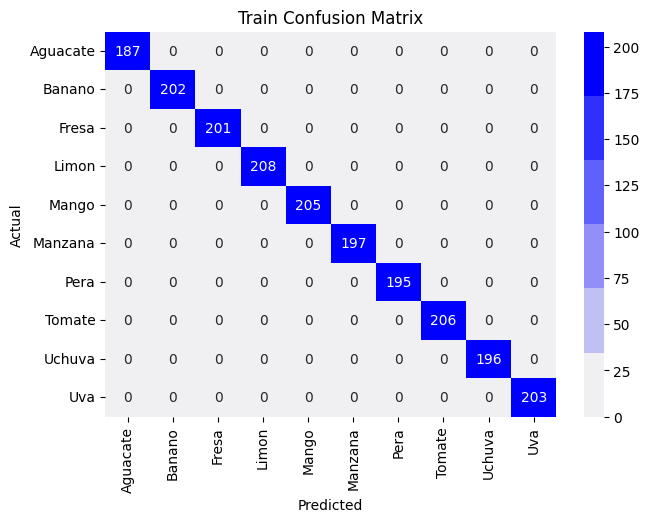

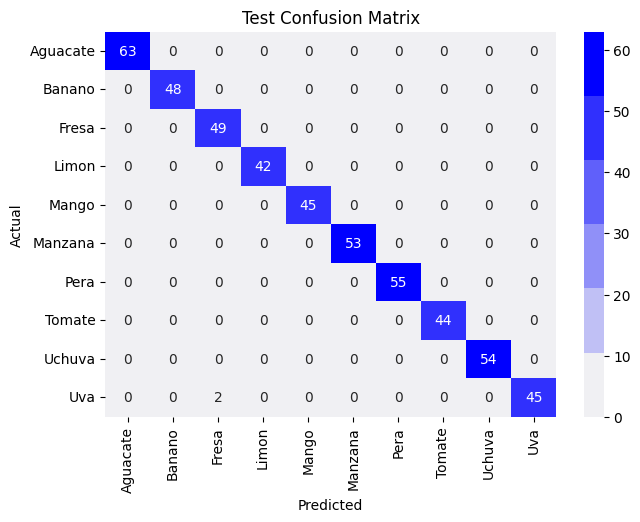

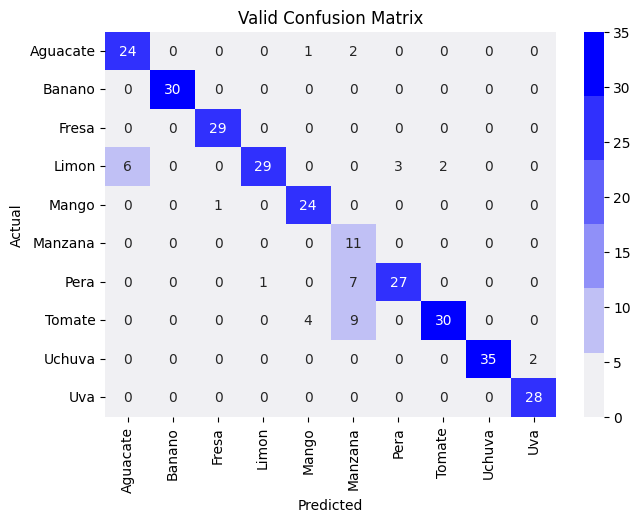

In [157]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')
confusion_matrix_graf(valid_pred, y_valid, 'Valid')

In [163]:
df_metrics = metrics_train_test(y_train, y_train_pred, y_test, y_test_pred,valid_pred, y_valid,end_train-start,end_predict-end_train,end_valid-start_valid,y,'knn')
df_metrics

DataSet Model Neighbors  Accuracy  Precision    Recall        F1  Time (s)
0   Train   knn         5   1.00000   1.000000  1.000000  1.000000  0.016867
1    Test   knn         5   0.99600   0.996078  0.995745  0.995826  0.005622
2   Valid   knn         5   0.87541   0.871106  0.898894  0.866113  0.018685

In [159]:
2 = 2/0


SyntaxError: cannot assign to literal (4047901929.py, line 1)

# SVM (Support Vector Machine)

In [ ]:
clf = SGDClassifier(loss='hinge', random_state=0)
param = {'alpha':[10**x for x in range(-5,3)],
         'penalty': ['l2','l1']}


# initialization
scoring = {'acc' : 'accuracy',
        'precision_micro' : 'precision_micro',
        'recall_micro' : 'recall_micro',
        'f1_micro':'f1_micro'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l2; acc: (train=0.975, test=0.964) f1_micro: (train=0.975, test=0.964) precision_micro: (train=0.975, test=0.964) recall_micro: (train=0.975, test=0.964) total time=   0.1s
[CV 2/3] END alpha=1e-05, penalty=l2; acc: (train=0.972, test=0.964) f1_micro: (train=0.972, test=0.964) precision_micro: (train=0.972, test=0.964) recall_micro: (train=0.972, test=0.964) total time=   0.0s
[CV 3/3] END alpha=1e-05, penalty=l2; acc: (train=0.986, test=0.980) f1_micro: (train=0.986, test=0.980) precision_micro: (train=0.986, test=0.980) recall_micro: (train=0.986, test=0.980) total time=   0.0s
[CV 1/3] END alpha=1e-05, penalty=l1; acc: (train=0.986, test=0.976) f1_micro: (train=0.986, test=0.976) precision_micro: (train=0.986, test=0.976) recall_micro: (train=0.986, test=0.976) total time=   0.0s
[CV 2/3] END alpha=1e-05, penalty=l1; acc: (train=0.981, test=0.984) f1_micro: (train=0.981, test=0.984) precis

In [ ]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(penalty='l1', random_state=0)
Mejores parámetros:  {'alpha': 0.0001, 'penalty': 'l1'}
Mejor puntuación (accuracy): 0.9834969902436169


In [ ]:
# Entrenamiento del modelo
start = time.time()
model = SGDClassifier(loss='hinge', random_state=0, alpha = 1e-05, penalty = 'l1').fit(x_train,y_train)
end_train = time.time()
y_test_pred = model.predict(x_test)
end_predict = time.time()
y_train_pred = model.predict(x_train)

In [ ]:
# Saving the Model to disk
pickle.dump(model, open('model_SVM.pkl', 'wb'))
model.get_params()

{'alpha': 1e-05,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l1',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

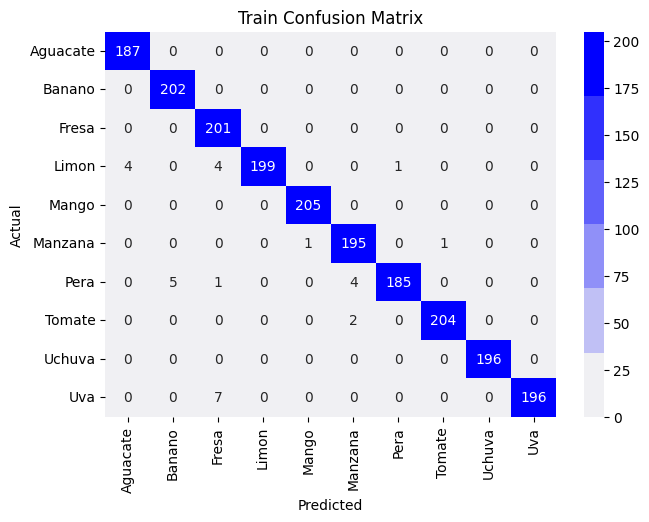

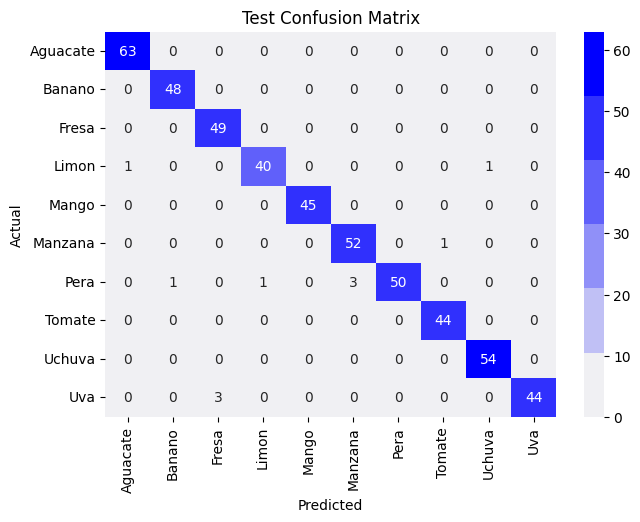

In [ ]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')
confusion_matrix_graf(y_test, y_test_pred, 'Test')

# Variando K

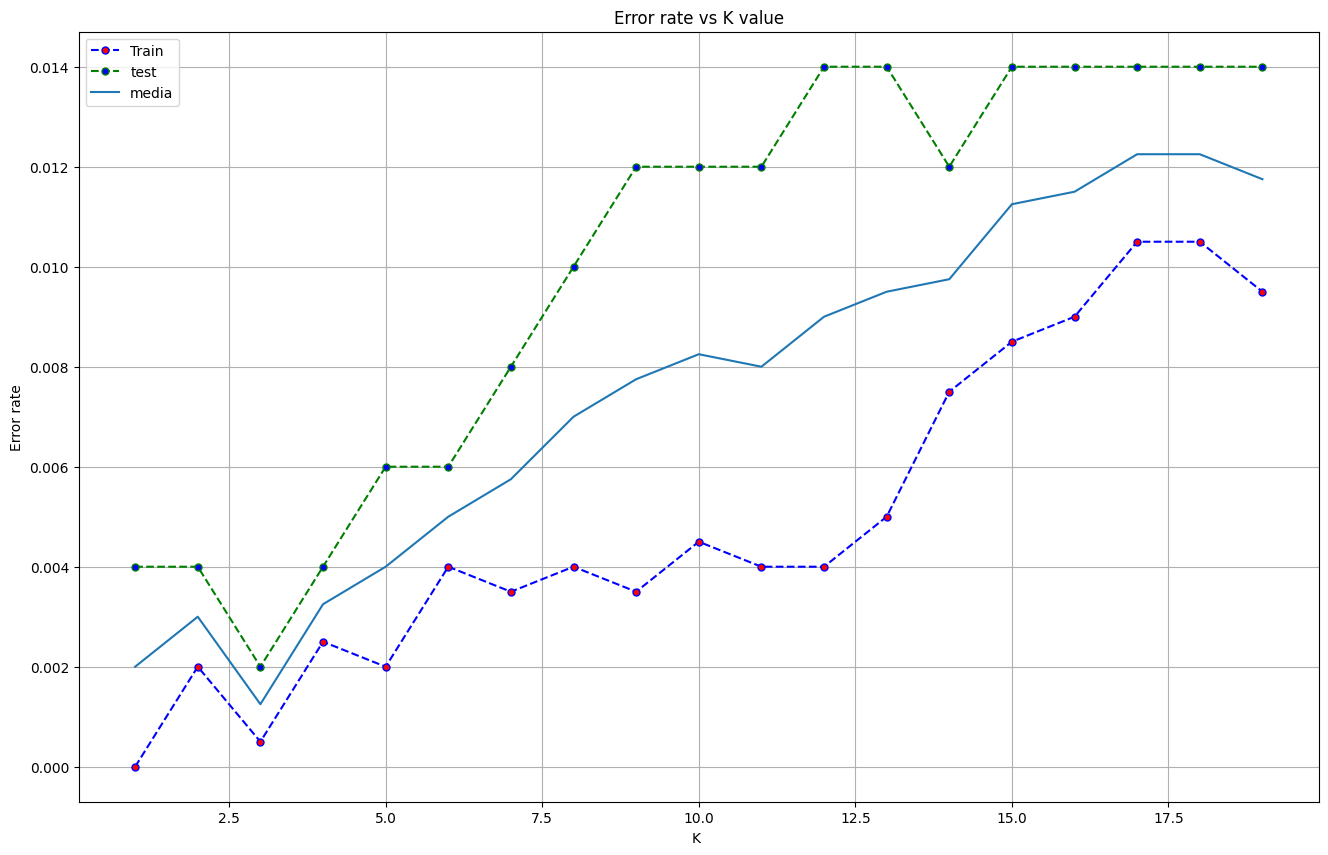

In [ ]:
test_error_rate = []
train_error_rate = []
mean_tt = []
l = 20
for i in range(1,l):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'uniform', algorithm = "auto", metric = 'minkowski', p = 2)
    knn.fit(x_train, y_train)
    """Train """
    train_pred_i = knn.predict(x_train)
    train_error_rate.append(np.mean(train_pred_i != y_train))
    """Test"""
    test_pred_i = knn.predict(x_test)
    test_error_rate.append(np.mean(test_pred_i != y_test))
   
mean_tt = np.mean([train_error_rate, test_error_rate], axis = 0)
plt.figure(figsize=(16,10))
plt.plot(range(1,l),train_error_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',
markersize=5, label = 'Train')
plt.plot(range(1,l),test_error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',
markersize=5, label = "test")
plt.plot(range(1,l), mean_tt, label = 'media')
plt.title('Error rate vs K value')
plt.xlabel('K ')
plt.ylabel('Error rate')
plt.grid()
plt.legend()
plt.show()

# Estimación mejor configuración algoritmo

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
param = dict(n_neighbors=list(range(1, 31,2)),weights=['uniform', 'distance'],algorithm=['auto','ball_tree','kd_tree','brute'])

# initialization
scoring = {'acc' : 'accuracy',
        'precision_micro' : 'precision_micro',
        'recall_micro' : 'recall_micro',
        'f1_micro':'f1_micro'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END algorithm=auto, n_neighbors=1, weights=uniform; acc: (train=1.000, test=0.994) f1_micro: (train=1.000, test=0.994) precision_micro: (train=1.000, test=0.994) recall_micro: (train=1.000, test=0.994) total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=1, weights=uniform; acc: (train=1.000, test=0.994) f1_micro: (train=1.000, test=0.994) precision_micro: (train=1.000, test=0.994) recall_micro: (train=1.000, test=0.994) total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=1, weights=uniform; acc: (train=1.000, test=0.998) f1_micro: (train=1.000, test=0.998) precision_micro: (train=1.000, test=0.998) recall_micro: (train=1.000, test=0.998) total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=1, weights=distance; acc: (train=1.000, test=0.994) f1_micro: (train=1.000, test=0.994) precision_micro: (train=1.000, test=0.994) recall_micro: (train=1.000, test=0.994) total time=   0.0s
[CV 2/3] END alg

In [ ]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  KNeighborsClassifier(n_neighbors=1)
Mejores parámetros:  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Mejor puntuación (accuracy): 0.9955014984999991


Variando K y Datos

In [ ]:
x = df_frutas_norm.drop(['clase'], axis = 1)       #Entradas
y =  df_frutas_norm['clase']                       #Targets
test_error_rate = []
train_error_rate = []
k_optimo_list = []
l = 26
for r in range(0,10000,50):    #Variando Distribución aleatoria de datos con r
  x_train, x_step, y_train, y_step = train_test_split(x, y, test_size = 0.3, random_state = r )

  """Ahora de step sacar test y valiación"""
  x_test, x_valid, y_test, y_valid = train_test_split (x_step, y_step, test_size = 0.333333333, random_state = r)
  
  for i in range(1,l,2): #Variando k vencinos de 1 hasta L - 1
      knn = KNeighborsClassifier(n_neighbors = i, weights = 'uniform', algorithm = "auto", metric = 'minkowski', p = 2)
      knn.fit(x_train, y_train)

      """Train error"""
      train_pred_i = knn.predict(x_train)
      train_error_rate.append(np.mean(train_pred_i != y_train))
      """Test error"""
      test_pred_i = knn.predict(x_test)
      test_error_rate.append(np.mean(test_pred_i != y_test))

  test_error_rate1 = np.array(test_error_rate )   #Copia de Vector de error
  train_error_rate1 = np.array(train_error_rate)  
  media_error = np.mean([train_error_rate1,test_error_rate1], axis=0)  #Media de error Train y Test para cada K
  #tt = np.ones(len(media_error))
  tt = np.abs(test_error_rate1 - train_error_rate1)  #Distancia absoluta entre los train y test
  tt[media_error > 0.05] = 1   #Filtra las distancias que tengan un error promedio menor a limite
  #min = tt.min()         #Encuentra el valor minimo del vector de distancias train-test

  factor = media_error*tt
  min = tt.min()
  
  #k_optimo = (argwhere(factor == min) + 1)
  #k_optimo = k_optimo.min()


  #Para solo k impares
  k_optimo = ((argwhere(tt == min)*2) + 1)
  k_optimo = k_optimo.min()

  k_optimo_list.append(k_optimo) #Almacena los k optimos para cada iteración
  test_error_rate = [] #Vaciar vectores para la siguiente iteración
  train_error_rate = []

print('Promedio K optimo : ', np.mean(k_optimo_list)) #imprime el promedio de K optimo
for k in range(20): #Verificar para cada valor, de K cuantas veces fue el optimo
  print (k, k_optimo_list.count(k))


Promedio K optimo :  7.74
0 0
1 72
2 0
3 33
4 0
5 15
6 0
7 10
8 0
9 7
10 0
11 11
12 0
13 2
14 0
15 6
16 0
17 7
18 0
19 9


# Validación variando solo distribución de datos

media Train 1.0
media Test 0.9969399999999999
media valid 0.9963599999999999


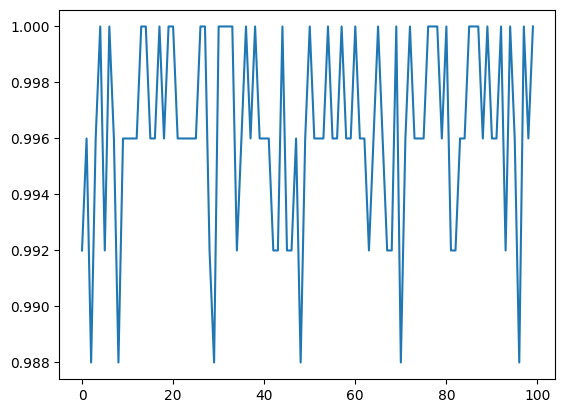

In [ ]:
x = df_frutas_norm.drop(['clase'], axis = 1)       #Entradas
y =  df_frutas_norm['clase']                       #Targets
test_error_rate = []
train_error_rate = []


valid_accuracy = []
train_accuracy = []
test_accuracy = []

for r in range(0,1000,10):    #Variando Distribución aleatoria de datos con r
  x_train, x_step, y_train, y_step = train_test_split(x, y, test_size = 0.3, random_state = r )

  """Ahora de step sacar test y valiación"""
  x_test, x_valid, y_test, y_valid = train_test_split (x_step, y_step, test_size = 0.333333333, random_state = r)

  knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', algorithm = "auto", metric = 'minkowski', p = 2)
  knn.fit(x_train, y_train)
  #entrenamiento: 
  y_pred_train = knn.predict(x_train)
  train_accuracy.append(accuracy_score(y_train, y_pred_train ))

  #entrenamiento: 
  y_pred_test = knn.predict(x_test)
  test_accuracy.append(accuracy_score(y_test, y_pred_test ))

  
  # validación
  y_pred_valid = knn.predict(x_valid)
  valid_accuracy.append(accuracy_score(y_valid, y_pred_valid ))


plt.plot(valid_accuracy)
print('media Train', np.mean(train_accuracy))
print('media Test',  np.mean(test_accuracy))
print('media valid', np.mean(valid_accuracy))




#Exporte de modelo

In [ ]:
pickle.dump(knn, open('model_KNN_1_distance.pkl', 'wb'))